<a href="https://colab.research.google.com/github/dmtzt/DeepLearning.AI-TensorFlow-Developer-Professional-Certificate/blob/main/c1/w2/computer_vision_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.9.2


## Dataset
Fashion MNIST is available as a dataset with an API call in Tensorflow

- 60,000 images to train the network
- 10,000 images to test the network

### Labels
The labels describing the images are numbers, mainly for 2 reasons:
1. Computers do better with numbers than with texts
2. Bias towards a specific language is reduced 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 9
IMAGE:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 2

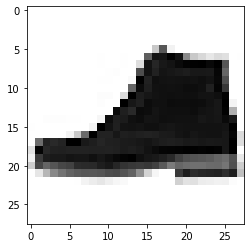

In [9]:
index = 42

np.set_printoptions(linewidth=320)

print('LABEL:', train_labels[index])
print('IMAGE:\n', train_images[index])

plt.imshow(train_images[index], cmap='Greys')

### Normalization
Neural networks for image processing work better with normalized data

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Callback
- Implements a function called by the callback when an epoch ends
- In this case, the training is canceled if the loss is below a threshold

In [20]:
class MyCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') < 0.4):
      print('\nLoss is low, cancel training')
      self.model.stop_training = True

In [21]:
callback = MyCallback()

## Model

### First layer
`Flatten` takes the 28x28 image square and turns it into a simple linear array.

### Last layer
The last layer has 10 neurons because there are 10 classes of clothing in the dataset.

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training

In [26]:
model.fit(train_images, train_labels, epochs=5, callbacks=[callback])

Epoch 1/5
1859/1875 [============================>.] - ETA: 0s - loss: 0.3381 - accuracy: 0.8755
Loss is low, cancel training
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3382 - accuracy: 0.8754


In [14]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3627 - accuracy: 0.8661


[0.3627217411994934, 0.866100013256073]